<a href="https://colab.research.google.com/github/OR8a/Amman-Restaurant-Sales-Analysis/blob/main/Amman_restaurant_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid")

df = pd.read_csv("/content/restaurant_sales - restaurant_sales.csv")

df.head()

,OrderID,Date,Item,Category,Quantity,Price,Payment,Customer_Age,Customer_Gender,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1.0,2/22/2024,Pizza,Food,3.0,8.0,Online,40.0,Female,NaN,NaN,24.0
1,2.0,2/22/2024,Pizza,Food,2.0,8.0,Card,46.0,Male,NaN,NaN,16.0
2,3.0,1/12/2024,Fries,Food,1.0,3.0,Card,18.0,Male,NaN,NaN,3.0
3,4.0,1/14/2024,Coffee,Beverage,4.0,3.0,Card,42.0,Male,NaN,NaN,12.0
4,5.0,2/5/2024,Juice,Beverage,5.0,3.5,Online,42.0,Female,NaN,NaN,17.5


In [5]:
df.dropna(axis=1 , how= 'all' , inplace=True)

In [6]:
df.head()

,OrderID,Date,Item,Category,Quantity,Price,Payment,Customer_Age,Customer_Gender,Unnamed: 11
0,1.0,2/22/2024,Pizza,Food,3.0,8.0,Online,40.0,Female,24.0
1,2.0,2/22/2024,Pizza,Food,2.0,8.0,Card,46.0,Male,16.0
2,3.0,1/12/2024,Fries,Food,1.0,3.0,Card,18.0,Male,3.0
3,4.0,1/14/2024,Coffee,Beverage,4.0,3.0,Card,42.0,Male,12.0
4,5.0,2/5/2024,Juice,Beverage,5.0,3.5,Online,42.0,Female,17.5


In [7]:
df['Total']= df["Quantity"] * df["Price"]

print(df["Total"])

0      24.0
1      16.0
2       3.0
3      12.0
4      17.5
       ... 
496    16.0
497     9.0
498     8.0
499    12.0
500     NaN
Name: Total, Length: 501, dtype: float64


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

print(df["Date"])

0     2024-02-22
1     2024-02-22
2     2024-01-12
3     2024-01-14
4     2024-02-05
         ...    
496   2024-02-09
497   2024-02-20
498   2024-02-20
499   2024-02-06
500          NaT
Name: Date, Length: 501, dtype: datetime64[ns]


In [9]:
Revenue = df["Total"].sum()

print(Revenue)

7175.5


In [10]:
top_best_5_items= df.groupby(df["Item"])["Quantity"].sum().sort_values(ascending=False).nlargest(5)
# is the same
top_best_5_items= df.groupby(df["Item"])["Quantity"].sum().sort_values(ascending=False).head(5)

print(top_best_5_items)

Item
Salad       194.0
Coffee      184.0
Sandwich    181.0
Pasta       164.0
Coke        149.0
Name: Quantity, dtype: float64


In [11]:
df.groupby("Item")["Total"].sum()

,Total
Item,
Burger,625.0
Coffee,552.0
Coke,298.0
Fries,417.0
Ice Cream,568.0
Juice,374.5
Pasta,1230.0
Pizza,1152.0
Salad,873.0


In [12]:
Revenue_by_category = df.groupby("Category")["Total"].sum()

In [13]:
print(f'The total revenue: {Revenue}')
print(f"\n best selling items:\n{top_best_5_items}")

The total revenue: 7175.5

 best selling items:
Item
Salad       194.0
Coffee      184.0
Sandwich    181.0
Pasta       164.0
Coke        149.0
Name: Quantity, dtype: float64


In [14]:
df["Customer_Age"].min()

18.0

In [15]:
bins = [18,30,45,60,100]
labels = ['18-30', '31-45', '46-60', '60+']


ppy = df['Age_group'] = pd.cut(df['Customer_Age'], bins=bins, labels= ['Young', 'Middle-Age', 'senior', 'elderly'])

print(ppy)

0      Middle-Age
1          senior
2             NaN
3      Middle-Age
4      Middle-Age
          ...    
496    Middle-Age
497    Middle-Age
498        senior
499         Young
500           NaN
Name: Customer_Age, Length: 501, dtype: category
Categories (4, object): ['Young' < 'Middle-Age' < 'senior' < 'elderly']


In [16]:
df.head()


,OrderID,Date,Item,Category,Quantity,Price,Payment,Customer_Age,Customer_Gender,Unnamed: 11,Total,Age_group
0,1.0,2024-02-22,Pizza,Food,3.0,8.0,Online,40.0,Female,24.0,24.0,Middle-Age
1,2.0,2024-02-22,Pizza,Food,2.0,8.0,Card,46.0,Male,16.0,16.0,senior
2,3.0,2024-01-12,Fries,Food,1.0,3.0,Card,18.0,Male,3.0,3.0,NaN
3,4.0,2024-01-14,Coffee,Beverage,4.0,3.0,Card,42.0,Male,12.0,12.0,Middle-Age
4,5.0,2024-02-05,Juice,Beverage,5.0,3.5,Online,42.0,Female,17.5,17.5,Middle-Age


In [17]:
revenue_by_age = df.groupby('Age_group',observed=False)['Total'].sum()
print(revenue_by_age)

Age_group
Young         2113.0
Middle-Age    2460.5
senior        2406.5
elderly          0.0
Name: Total, dtype: float64


In [19]:
df['Day_Name'] = df['Date'].dt.day_name()

df.head()

,OrderID,Date,Item,Category,Quantity,Price,Payment,Customer_Age,Customer_Gender,Unnamed: 11,Total,Age_group,Day_Name
0,1.0,2024-02-22,Pizza,Food,3.0,8.0,Online,40.0,Female,24.0,24.0,Middle-Age,Thursday
1,2.0,2024-02-22,Pizza,Food,2.0,8.0,Card,46.0,Male,16.0,16.0,senior,Thursday
2,3.0,2024-01-12,Fries,Food,1.0,3.0,Card,18.0,Male,3.0,3.0,NaN,Friday
3,4.0,2024-01-14,Coffee,Beverage,4.0,3.0,Card,42.0,Male,12.0,12.0,Middle-Age,Sunday
4,5.0,2024-02-05,Juice,Beverage,5.0,3.5,Online,42.0,Female,17.5,17.5,Middle-Age,Monday


In [20]:
df["Is_weekend"] = df['Day_Name'].isin(['Friday', 'Saturday'])

df.groupby("Is_weekend")["Total"].mean()



,Total
Is_weekend,
False,14.721311
True,13.339552


**Visualization**

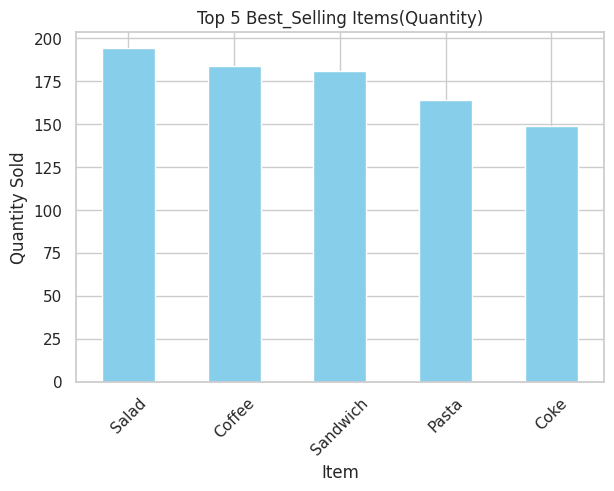

In [21]:

plt.figure(figsize= (15, 10))

plt.subplot(2,2,1)

top_best_5_items.plot(kind='bar', color= 'skyblue')
#sns.barplot(color='skyblue', top_best_5_items , y= 'Quantity')

plt.title("Top 5 Best_Selling Items(Quantity)")

plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Revenue by Category')

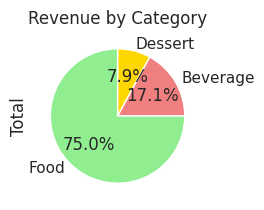

In [22]:
plt.subplot(2,2,2)

Revenue_by_category.plot(kind="pie", autopct= '%1.1f%%', colors=['lightcoral', 'gold', 'lightgreen'])

plt.title("Revenue by Category")

(array([19723, 19754, 19782]),
 [Text(19723, 0, '\n\nJan\n2024'),
  Text(19754, 0, '\n\nFeb'),
  Text(19782, 0, '')])

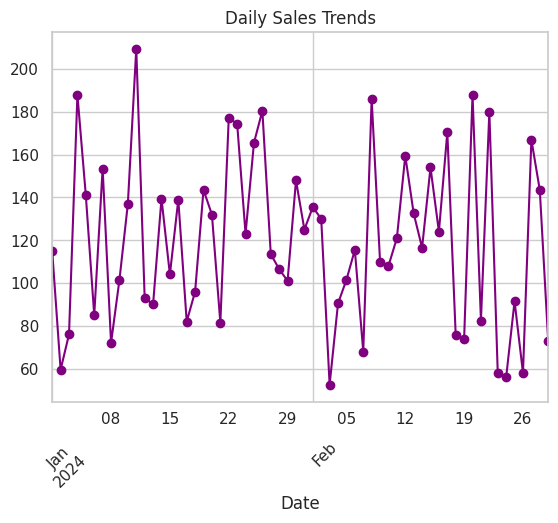

In [23]:

df.groupby('Date')['Total'].sum().plot(kind= 'line', marker= 'o', color= 'purple')

plt.title('Daily Sales Trends')
plt.xticks(rotation=45)

/tmp/ipython-input-2012864784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment', data=df, palette= 'Set2')


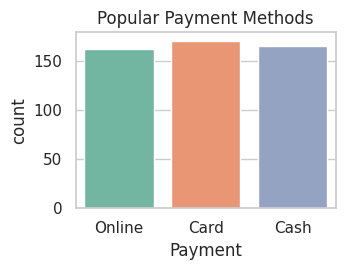

In [24]:
plt.subplot(2,2,4)

sns.countplot(x='Payment', data=df, palette= 'Set2')

plt.title('Popular Payment Methods')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2329278787.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'Customer_Gender', y="Total", data=df, estimator=sum, ci=None)


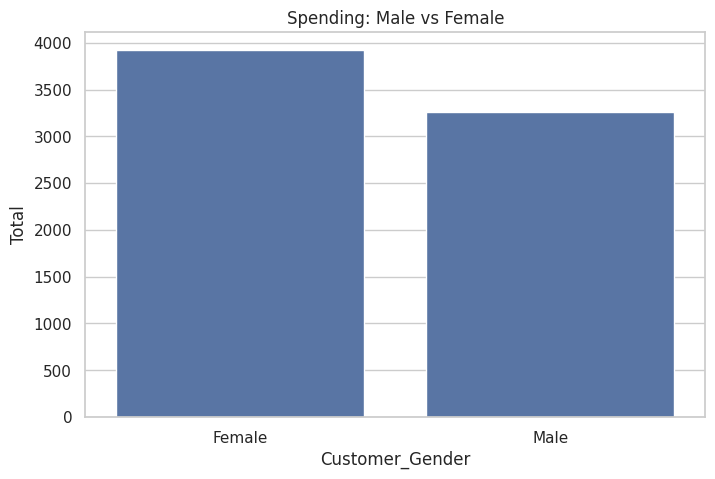

In [25]:
plt.figure(figsize=(8,5))

sns.barplot(x= 'Customer_Gender', y="Total", data=df, estimator=sum, ci=None)

plt.title('Spending: Male vs Female')
plt.show()

<Axes: xlabel='Customer_Gender', ylabel='count'>

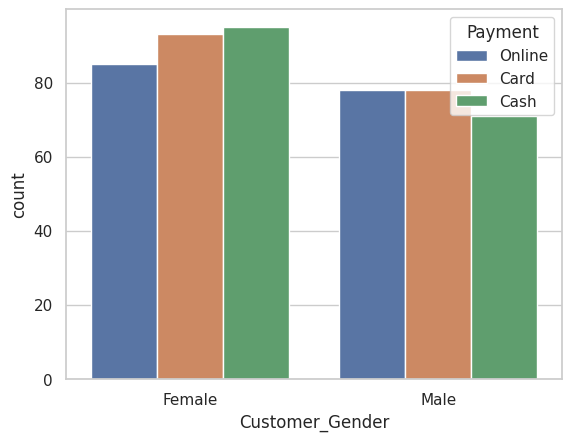

In [26]:
sns.countplot(x="Customer_Gender", data=df, hue= "Payment")

/tmp/ipython-input-2199042090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x= "Payment", y= "Total", data=payment_sales, palette= 'Set2')


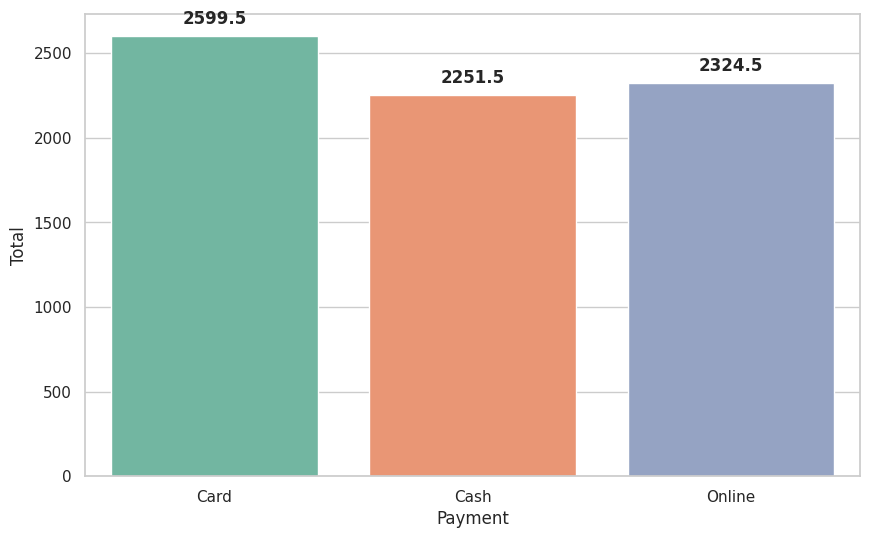

In [27]:
payment_sales = df.groupby("Payment")["Total"].sum().reset_index()

plt.figure(figsize= (10,6))
plot = sns.barplot(x= "Payment", y= "Total", data=payment_sales, palette= 'Set2')

for p in plot.patches:
  label = format(p.get_height(), '.1f')
  plot.annotate(
      label,
       (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', xytext = (0,9) , textcoords = 'offset points', fontsize=12, fontweight= 'bold')
plt.show()

In [28]:
payment_sales = df.groupby("Payment")["Total"].sum().reset_index()
print(payment_sales)

  Payment   Total
0    Card  2599.5
1    Cash  2251.5
2  Online  2324.5


/tmp/ipython-input-1443429249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x= "Payment", y= "Total", data=payment_sales, palette= 'Set2')


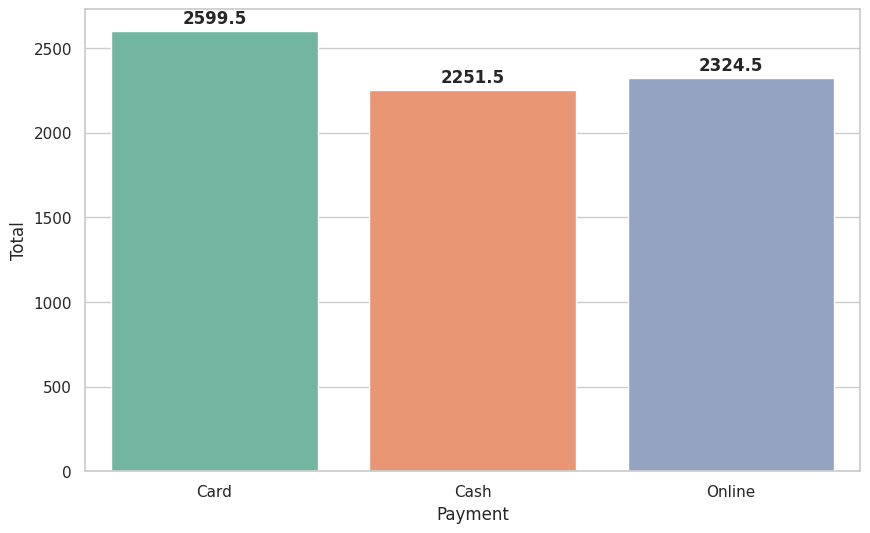

In [29]:
payment_sales = df.groupby("Payment")["Total"].sum().reset_index()

plt.figure(figsize= (10,6))
plot = sns.barplot(x= "Payment", y= "Total", data=payment_sales, palette= 'Set2')

for p in plot.patches:
  plot.annotate(format(p.get_height(),'.1f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',va= 'center', xytext = (0,9) , textcoords = 'offset points', fontsize=12, fontweight= 'bold')

plt.show()